In [11]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
tracep1_path = "/home/lei/rajrup/KinectStream/Scripts/mahi_traces/net-trace/mahimahi/laia-dst/tracep1-scaled10.0.txt"
wifi25_path = "/home/lei/rajrup/KinectStream/Scripts/mahi_traces/net-trace/mahimahi/network/wifi-25-scaled15.0.down"

tracep1 = pd.read_csv(tracep1_path, sep=' ', header=None)
wifi25 = pd.read_csv(wifi25_path, sep=' ', header=None)

In [13]:
wifi25

,0
0,2
1,2
2,2
3,2
4,2
...,...
892795,119998
892796,119998
892797,119998
892798,119998


In [14]:
freq = collections.Counter(wifi25[0])

# Calculate the throughput of the wifi25
min_time = min(freq.keys())
max_time = max(freq.keys())



In [15]:
def read_mahimahi_trace(path):
    throughput = {}
    with open(path, 'r') as file:
        lines = file.readlines()
        prev_time_in_sec = 0
        bytes_ = 0.0
        for line in lines:
            time = int(line.strip())
            time_in_sec = int(time / 1000)
            if time_in_sec > prev_time_in_sec:
                print(f"Time: {time_in_sec}, Bytes: {bytes_}, Throughput: {bytes_ * 8.0 / 1000.0 / 1000.0} Mbps")
                throughput[time_in_sec] = bytes_ * 8.0 / 1000.0 / 1000.0
                bytes_ = 0.0
                prev_time_in_sec = time_in_sec
            else:
                bytes_ += 1500.0
    return throughput

In [16]:
throughput_wifi25 = read_mahimahi_trace(wifi25_path)
throughput_tracep1 = read_mahimahi_trace(tracep1_path)

Time: 1, Bytes: 11902500.0, Throughput: 95.22 Mbps
Time: 2, Bytes: 11721000.0, Throughput: 93.768 Mbps
Time: 3, Bytes: 11068500.0, Throughput: 88.548 Mbps
Time: 4, Bytes: 10461000.0, Throughput: 83.688 Mbps
Time: 5, Bytes: 8796000.0, Throughput: 70.368 Mbps
Time: 6, Bytes: 10168500.0, Throughput: 81.348 Mbps
Time: 7, Bytes: 12688500.0, Throughput: 101.508 Mbps
Time: 8, Bytes: 10933500.0, Throughput: 87.468 Mbps
Time: 9, Bytes: 11001000.0, Throughput: 88.008 Mbps
Time: 10, Bytes: 11383500.0, Throughput: 91.068 Mbps
Time: 11, Bytes: 11901000.0, Throughput: 95.208 Mbps
Time: 12, Bytes: 10753500.0, Throughput: 86.028 Mbps
Time: 13, Bytes: 11451000.0, Throughput: 91.608 Mbps
Time: 14, Bytes: 11338500.0, Throughput: 90.708 Mbps
Time: 15, Bytes: 11383500.0, Throughput: 91.068 Mbps
Time: 16, Bytes: 11856000.0, Throughput: 94.848 Mbps
Time: 17, Bytes: 12058500.0, Throughput: 96.468 Mbps
Time: 18, Bytes: 11833500.0, Throughput: 94.668 Mbps
Time: 19, Bytes: 12261000.0, Throughput: 98.088 Mbps
Tim

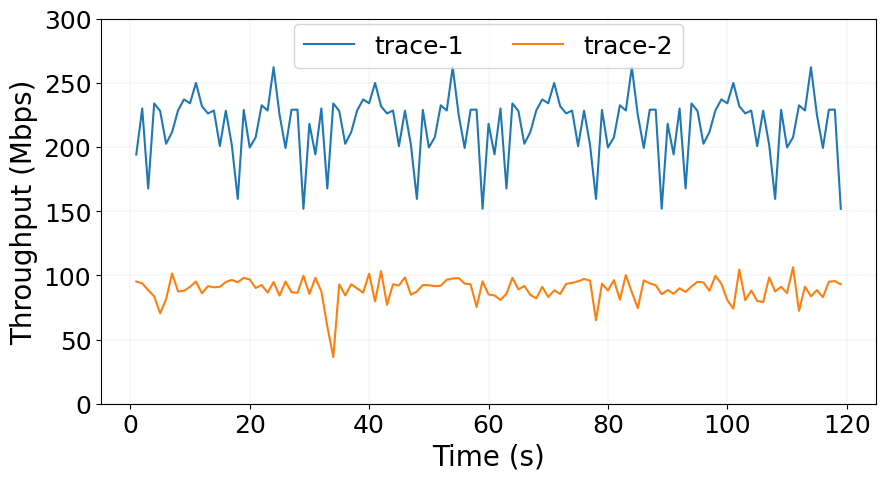

In [29]:
time_limit = min(max(throughput_wifi25.keys()), max(throughput_tracep1.keys()))

# Plot the throughput till time limit

fig = plt.figure(figsize=(10, 5))
plt.plot(list(throughput_tracep1.keys())[:time_limit], list(throughput_tracep1.values())[:time_limit], label='trace-1')
plt.plot(list(throughput_wifi25.keys())[:time_limit], list(throughput_wifi25.values())[:time_limit], label='trace-2')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Throughput (Mbps)', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 300)
plt.grid(True, which='major', linestyle='dashed', linewidth='0.1', color='grey')
plt.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.019), fontsize=18)
plt.show()

# Save plot as pdf
fig.savefig('/home/lei/rajrup/KinectStream/Scripts/Experiments/output/plots/throughput_wifi25_tracep1.pdf', bbox_inches='tight')

In [18]:
# Max, min, avg, 10th and 90th percentile throughput
print(f"Max throughput of wifi25: {max(throughput_wifi25.values())} Kbps")
print(f"Min throughput of wifi25: {min(throughput_wifi25.values())} Kbps")
print(f"Avg throughput of wifi25: {np.mean(list(throughput_wifi25.values()))} Kbps")
print(f"10th percentile throughput of wifi25: {np.percentile(list(throughput_wifi25.values()), 10)} Kbps")
print(f"90th percentile throughput of wifi25: {np.percentile(list(throughput_wifi25.values()), 90)} Kbps")
print("--------------------------------------------")

print(f"Max throughput of tracep1: {max(throughput_tracep1.values())} Kbps")
print(f"Min throughput of tracep1: {min(throughput_tracep1.values())} Kbps")
print(f"Avg throughput of tracep1: {np.mean(list(throughput_tracep1.values()))} Kbps")
print(f"10th percentile throughput of tracep1: {np.percentile(list(throughput_tracep1.values()), 10)} Kbps")
print(f"90th percentile throughput of tracep1: {np.percentile(list(throughput_tracep1.values()), 90)} Kbps")
print("--------------------------------------------")

Max throughput of wifi25: 106.368 Kbps
Min throughput of wifi25: 36.348 Kbps
Avg throughput of wifi25: 89.20305882352942 Kbps
10th percentile throughput of wifi25: 80.52 Kbps
90th percentile throughput of wifi25: 98.088 Kbps
--------------------------------------------
Max throughput of tracep1: 262.188 Kbps
Min throughput of tracep1: 151.908 Kbps
Avg throughput of tracep1: 216.90382 Kbps
10th percentile throughput of tracep1: 191.51880000000014 Kbps
90th percentile throughput of tracep1: 234.40800000000007 Kbps
--------------------------------------------
